In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from datetime import datetime

In [2]:
# Read in csv files
realtor = pd.read_csv("../data/realtor_housing_metrics_state.csv")

national_realtor = pd.read_csv("../data/realtor_housing_metrics_country.csv")

median_income = pd.read_csv("../data/median_income_by_state.csv")

national_median_income = pd.read_csv("../data/income_updated.csv", index_col = [0])

In [3]:
# Converting to datetime column & creating year column
realtor['month_date_yyyymm'] = pd.to_datetime(realtor['month_date_yyyymm'])

realtor['year'] = realtor['month_date_yyyymm'].dt.year

realtor['month'] = realtor['month_date_yyyymm'].dt.month_name()

national_realtor['month_date_yyyymm'] = pd.to_datetime(national_realtor['month_date_yyyymm'])

national_realtor['year'] = national_realtor['month_date_yyyymm'].dt.year

national_realtor['month'] = national_realtor['month_date_yyyymm'].dt.month_name()

In [4]:
# Creating df for housing by state & housing for the whole country
state_housing_df = realtor.merge(median_income, how = 'left')

national_housing_df = national_realtor.merge(national_median_income, how = 'left')

In [5]:
# Take median income and divide by median listing price
national_housing_df['Income to Home Price Ratio'] = national_housing_df['median_income'] / national_housing_df['median_listing_price']
state_housing_df['Income to Home Price Ratio'] = state_housing_df['Households'] / state_housing_df['median_listing_price']

In [6]:
# Rename columns
national_housing_df = national_housing_df.rename(columns = {'median_listing_price': 'Median Listing Price',
                                                           'median_income': 'Median Income',
                                                           'median_square_feet': 'Median Square Feet',
                                                           'median_listing_price_per_square_foot': 'Median Listing Price per Square Foot'})

state_housing_df = state_housing_df.rename(columns = {'Households': 'Median Income',
                                  'median_listing_price': 'Median Listing Price',
                                                     'median_square_feet': 'Median Square Feet',
                                                           'median_listing_price_per_square_foot': 'Median Listing Price per Square Foot'})

In [7]:
state_housing_df.to_csv("../data/state_housing.csv", index = False)
national_housing_df.to_csv("../data/national_housing.csv", index = False)

national_housing_df = pd.read_csv('../data/national_housing.csv')

C:\Users\kidsa\AppData\Local\Temp\ipykernel_42212\2410405451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_filtered_ratio['month'] = pd.Categorical(n_filtered_ratio['month'], categories = month_order, ordered = True)
C:\Users\kidsa\AppData\Local\Temp\ipykernel_42212\2410405451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_filtered_ratio['Ratio Yearly Average'] = n_filtered_ratio.groupby('year')['Income to Home Price Ratio'].transform('mean')
C:\Users\kidsa\AppData\Local\Temp\ipykernel_42212\

<BarContainer object of 12 artists>

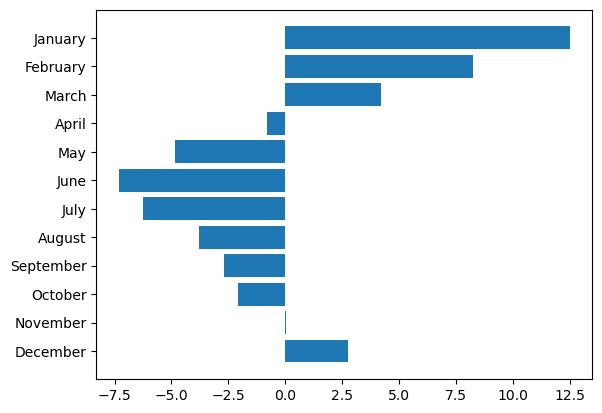

In [72]:
n_filtered_ratio = national_housing_df.dropna(subset = 'Income to Home Price Ratio')

# Make months a categorical variable with an order
month_order = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
n_filtered_ratio['month'] = pd.Categorical(n_filtered_ratio['month'], categories = month_order, ordered = True)

n_filtered_ratio['Ratio Yearly Average'] = n_filtered_ratio.groupby('year')['Income to Home Price Ratio'].transform('mean')

n_filtered_ratio['monthly_pct_diff'] = ((n_filtered_ratio['Income to Home Price Ratio'] - n_filtered_ratio['Ratio Yearly Average']) / n_filtered_ratio['Ratio Yearly Average']) * 100

n_filtered_ratio

filtered = n_filtered_ratio.query(f"year == 2022")

plt.barh(width = filtered['monthly_pct_diff'], y = filtered['month'])

<Axes: ylabel='month'>

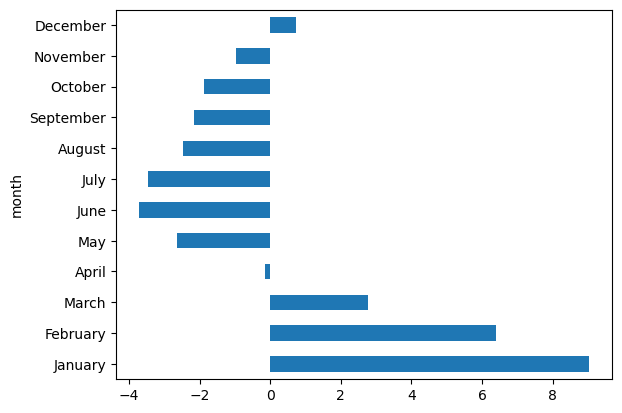

In [77]:
n_filtered_ratio.groupby('month')['monthly_pct_diff'].mean().plot(kind = 'barh')

(82.0, 113.8)

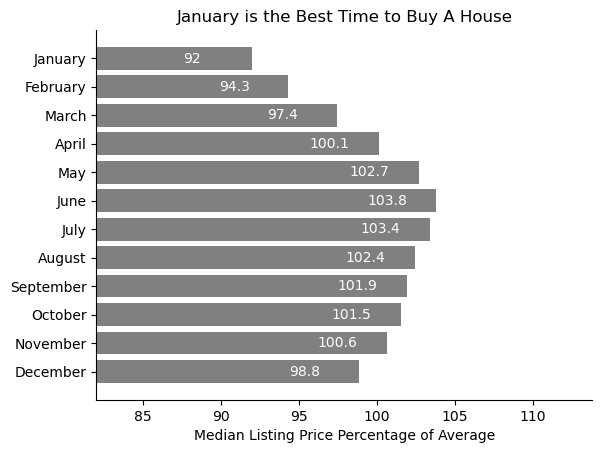

In [117]:
national_housing_df = national_housing_df.query('year != 2024')

national_housing_df['Median Listing Price Yearly Average'] = national_housing_df.groupby('year')['Median Listing Price'].transform('mean')

national_housing_df['Median Listing Price Percentage of Average'] = (national_housing_df['Median Listing Price'] / national_housing_df['Median Listing Price Yearly Average']) * 100

# Make months a categorical variable with an order
month_order = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
national_housing_df['month'] = pd.Categorical(national_housing_df['month'], categories = month_order, ordered = True)

agg_value = national_housing_df.groupby('month')['Median Listing Price Percentage of Average'].mean().reset_index()

agg_value = agg_value.sort_values('month', ascending = False)

metric = 'Median Listing Price Percentage of Average'

# Define x and y
x = agg_value[f'{metric}']
y = agg_value['month']

# Round x values
x = round(x,1)

# Create horizontal bar chart for top 10 states
fig, ax = plt.subplots()
bars = ax.barh(y, x, color = 'grey')

# # Highlight a specific state
# for bar, state in zip(bars, y):
#     if state in states:
#         bar.set_color('blue')

# Set the title and axes
ax.set_xlabel(f'{metric}')
ax.set_title('January is the Best Time to Buy A House')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the bar numbers
ax.bar_label(bars, color = 'white', padding = -50)

# Calculate the max of the metric and round
min_value = x.min()

max_value = x.max()


# Set the x range
ax.set_xlim(min_value - 10, max_value + 10)

In [120]:
agg_value['Median Listing Price Percentage of Average'].min()

91.96290570539443

# Create affordability index line graph at national level

In [108]:
max_round_parameter

-2

In [8]:
national_housing_df['month_date_yyyymm'] = pd.to_datetime(national_housing_df['month_date_yyyymm'])

Text(0.5, 1.0, 'Income to Home Price Ratio Over Time')

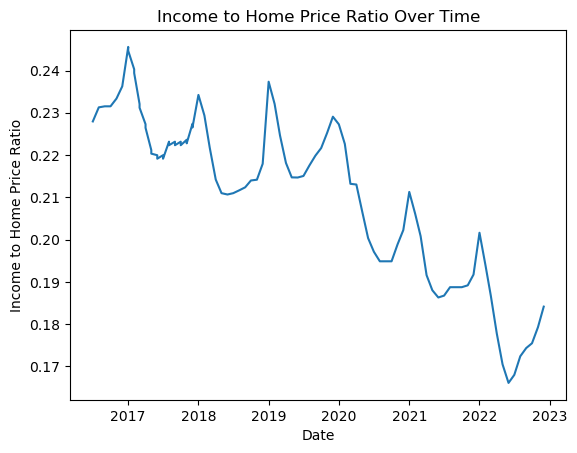

In [9]:
# Create line graph for national affordability index over several years
fig, ax = plt.subplots()
ax.plot(national_housing_df['month_date_yyyymm'], national_housing_df['Income to Home Price Ratio'])

# Set the title and axes
ax.set_xlabel('Date')
ax.set_ylabel('Income to Home Price Ratio')
ax.set_title('Income to Home Price Ratio Over Time')

In [10]:
# Select the year
year = 2019

# Create dataframe filtered for selected year
filtered_df = national_housing_df.query(f'year == {year}')

# Define x and y
x = filtered_df['affordability_index']
y = filtered_df['month']

# Create horizontal bar chart for national affordability index by month
fig, ax = plt.subplots()
bars = ax.barh(y, x)

# Set the title and axes
ax.set_xlabel('Income to Home Price Ratio')
ax.set_ylabel('Month')
ax.set_title(f'Income to Home Price Ratio by Month for {year}')

ax.bar_label(bars)
ax.set_xlim(0,0.35)

KeyError: 'affordability_index'

# Create affordability index line graph by state

In [ ]:
national_housing_df['affordability_index'] = national_housing_df['median_income'] / national_housing_df['median_listing_price']

In [ ]:
state_housing_df['affordability_index'] = state_housing_df['Households'] / state_housing_df['median_listing_price']

In [ ]:
states = ['Florida','Michigan','Tennessee']

state_housing_df[state_housing_df['state'].isin(states)]

In [ ]:
show_national = True

# Shows the affordability index over the years for the selected state
metric = 'median_listing_price'
states = ['Florida','Michigan','Tennessee']

# Subsetting dataframe for selected states
housing_for_state = state_housing_df[state_housing_df['state'].isin(states)]

# Create line graph for national affordability index over several years
fig, ax1 = plt.subplots()

for state in states:
    # Subset dataset for that state
    state_data = housing_for_state.query(f"state == '{state}'")

    # Plot line graph 
    ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'grey')

    # Label the end of each line
    ax1.text(state_data['month_date_yyyymm'].iloc[0],
         state_data[f'{metric}'].iloc[0],
         state,
         fontsize = 9,
         ha = 'left',
         color = 'grey',
         fontweight = 'bold')

# Add a line for the entire united states
if show_national == True:
    ax1.plot(national_housing_df['month_date_yyyymm'], national_housing_df[f'{metric}'], color = 'black')
    
    ax1.text(national_housing_df['month_date_yyyymm'].iloc[0],
            national_housing_df[f'{metric}'].iloc[0],
            'United States',
            fontsize = 9,
            ha = 'left',
            color = 'black',
            fontweight = 'bold')

# Set the title and axes
ax1.set_xlabel('Year')
ax1.set_ylabel(f'{metric}')
ax1.set_title(f'{metric} Over Time')

# Remove the spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Define y range
ax1.set_ylim(bottom = 0)

In [ ]:
states = ['Tennessee','Michigan','Florida']

In [ ]:
filtered_df = state_housing_df

In [ ]:
# Function that takes in metric, month, and year and returns the top 10 states for that specific metric in the given timeframe
def top_10_mlp(metric,month,year):

    local_filtered_df = filtered_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()

    local_filtered_df = local_filtered_df[['month_date_yyyymm','state',f'{metric}']]
    top_10_states = local_filtered_df.head(10)
    top_10_states = top_10_states.sort_values(by = f"{metric}", ascending = True)

    # Define x and y
    x = top_10_states[f'{metric}']
    y = top_10_states['state']

    # Create horizontal bar chart for top 10 states
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Highlight a specific state
    for bar, state in zip(bars, y):
        if state in states:
            bar.set_color('blue')

    # Set the title and axes
    ax.set_xlabel(f'{metric}')
    ax.set_title(f'Top 10 States Ranked by {metric} for April 2024 ')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)
    
    # Calculate the max of the metric and round
    max_value = x.max()
    value_length = len(str(int(max_value)))
    round_parameter = (value_length - 1) * -1

    # Set the x range
    ax.set_xlim((0,max_value))

    return fig

In [ ]:
top_10_mlp('Households','December',2022)

# Create top/bottom 5 states by affordability index bar chart

In [ ]:
state_housing_df

In [ ]:
metric = 'median_listing_price'
month = 'April'
year = 2024

filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
.sort_values(f"{metric}", ascending = False).reset_index()

filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
, ascending = False
top_10_states = filtered_df.head(10)
top_10_states = top_10_states.sort_values(by = f"{metric}", ascending = True)

bottom_10_states = filtered_df.tail(10)

# Define x and y
x = top_10_states[f'{metric}']
y = top_10_states['state']

# Create horizontal bar chart for national affordability index by month
fig, ax = plt.subplots()
bars = ax.barh(y, x, color = 'grey')

# Set the title and axes
ax.set_xlabel(f'{metric}')
ax.set_ylabel('State')
ax.set_title(f'Top 10 States by {metric} ')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.bar_label(bars, color = 'grey', fontweight = 'bold')

# Let's get the % median listing price increase

- For each state we need to subtract the earliest median listing price from the most recent median listing price and divide by the earliest median listing price
- Then we'll have the percentage increase from the starting date of that state

In [ ]:
# Sort the states from earliest date to latest
price_change = state_housing_df.sort_values(['state','month_date_yyyymm'])

# Grab the earliest price and most recent price
price_change = price_change.groupby('state').agg(earliest_price = ('median_listing_price','first'),
                                 latest_price = ('median_listing_price','last'))

# Calculate a percentage increase in price
price_change['percentage_increase'] = ((price_change['latest_price'] - price_change['earliest_price'])/ price_change['earliest_price']) * 100

# Reset the index
price_change = price_change.reset_index()

# Sort by the percentage increase and reset index
price_change = price_change.sort_values('percentage_increase', ascending = False)
price_change = price_change.reset_index(drop = True)

# Make a rank column
price_change = price_change = price_change.reset_index()\
.rename(columns = {'index': 'rank'})

# Add 1 to rank since index starts at 0
price_change['rank'] = price_change['rank'] + 1

# Subset data for selected columns: Rank, state, % increase
price_change = price_change[['rank','state','percentage_increase']]

# Convert to a csv file
price_change.to_csv('../data/mlp_percent_increase.csv', index = False)

#  Get 3 plots into one graph

In [ ]:
def mlp_pricing_trend(states, show_national):
    
    # Define the metric used
    metric = 'median_listing_price'
    year = 2022
    month = 'December'

    # Defining top 10 states and bottom 10 states
    top_10_states = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()\
    [['month_date_yyyymm','state',f'{metric}']].head(10)

    top_10_states = top_10_states['state'].unique()

    bottom_10_states = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()\
    [['month_date_yyyymm','state',f'{metric}']].tail(10)

    bottom_10_states = bottom_10_states['state'].unique()

    # Subsetting dataframe for selected states
    housing_for_state = state_housing_df[state_housing_df['state'].isin(states)]

    # Create line graph for median listing price over several years
    fig, ax1 = plt.subplots()

    for state in states:
        # Subset dataset for that state
        state_data = housing_for_state.query(f"state == '{state}'")
        
        if state in top_10_states:
            # Plot line graph 
            ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'blue')
            
            # Label the end of each line
            ax1.text(state_data['month_date_yyyymm'].iloc[0],
                state_data[f'{metric}'].iloc[0],
                state,
                fontsize = 9,
                ha = 'left',
                color = 'blue',
                fontweight = 'bold')
        
        elif state in bottom_10_states:
            # Plot line graph 
            ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'red')

            # Label the end of each line
            ax1.text(state_data['month_date_yyyymm'].iloc[0],
            state_data[f'{metric}'].iloc[0],
            state,
            fontsize = 9,
            ha = 'left',
            color = 'red',
            fontweight = 'bold')
        
        else:
            # Plot line graph 
            ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'grey')

            # Label the end of each line
            ax1.text(state_data['month_date_yyyymm'].iloc[0],
            state_data[f'{metric}'].iloc[0],
            state,
            fontsize = 9,
            ha = 'left',
            color = 'grey',
            fontweight = 'bold')   
        
    # Add a line for the entire united states
    if show_national == True:
        ax1.plot(national_housing_df['month_date_yyyymm'], national_housing_df[f'{metric}'], color = 'black')
        
        ax1.text(national_housing_df['month_date_yyyymm'].iloc[0],
                national_housing_df[f'{metric}'].iloc[0],
                'United States',
                fontsize = 9,
                ha = 'left',
                color = 'black',
                fontweight = 'bold')
        
    # Set the title and axes
    ax1.set_ylabel(f'{metric}')
    ax1.set_title(f'{metric} Over Time', loc = 'left')

    # Remove the spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Define y range
    ax1.set_ylim(bottom = 0)

    # Return the figure
    return(fig)

# Function that takes in metric, month, and year and returns the top 10 states for that specific metric in the given timeframe
def top_10_mlp(metric,month,year):

    filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()

    filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
    top_10_states = filtered_df.head(10)
    top_10_states = top_10_states.sort_values(by = f"{metric}", ascending = True)

    # Define x and y
    x = top_10_states[f'{metric}']
    y = top_10_states['state']

    # Create horizontal bar chart for national affordability index by month
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Highlight a specific state
    for bar, state in zip(bars, y):
        if state in states:
            bar.set_color('blue')

    # Set the title and axes
    ax.set_xlabel(f'{metric}')
    ax.set_title(f'Top 10 States by {metric} ')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)

    # Set the x range
    ax.set_xlim((0,900000))

    return fig

# Function that takes in metric, month, and year and returns the bottom 10 states for that specific metric in the given timeframe
def bottom_10_mlp(metric,month,year):

    filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
    .sort_values(f"{metric}", ascending = False).reset_index()

    filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
    bottom_10_states = filtered_df.tail(10)
    bottom_10_states = bottom_10_states.sort_values(by = f"{metric}", ascending = True)

    # Define x and y
    x = bottom_10_states[f'{metric}']
    y = bottom_10_states['state']

    # Create horizontal bar chart for national affordability index by month
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Highlight a specific state
    for bar, state in zip(bars, y):
        if state in states:
            bar.set_color('red')

    # Set the title and axes
    ax.set_xlabel(f'{metric}')
    ax.set_title(f'Bottom 10 States by {metric} ')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)

    # Set x range
    ax.set_xlim((0,900000))

    return fig

Gridspec doesn't look like it'll work for the streamlit dashboard

In [ ]:
mlp_increase = pd.read_csv("../data/mlp_percent_increase.csv")

In [ ]:
mlp_increase

In [ ]:
state_housing_df = 

In [ ]:
state_housing_df['month_date_yyyymm'].min().to_pydatetime().year

In [ ]:
state_housing_df[(state_housing_df['month_date_yyyymm'] >= start_date) & (state_housing_df['month_date_yyyymm'] <= end_date)]['month'].unique()

In [ ]:
state_housing_df['month_date_yyyymm'].min().to_pydatetime().strftime('%B')

In [ ]:
# Select metric to pull percentage increase for
metric = 'median_listing_price'

# Select start and end date
start_date = '2017-12-01'
end_date = '2020-12-01'

# Filter data based on date metrics
filtered_df = state_housing_df[(state_housing_df['month_date_yyyymm'] >= start_date) & (state_housing_df['month_date_yyyymm'] <= end_date)]

In [ ]:
# Sort the states from earliest date to latest
metric_change = filtered_df.sort_values(['state','month_date_yyyymm'])

# Grab the earliest price and most recent price
metric_change = metric_change.groupby('state').agg(earliest_metric = (f'{metric}','first'),
                                 latest_metric = (f'{metric}','last'))

# Calculate a percentage increase in price
metric_change['percentage_increase'] = ((metric_change['latest_metric'] - metric_change['earliest_metric'])/ metric_change['earliest_metric']) * 100

# Reset the index
metric_change = metric_change.reset_index()

# Sort by the percentage increase and reset index
metric_change = metric_change.sort_values('percentage_increase', ascending = False)
metric_change = metric_change.reset_index(drop = True)

# Make a rank column
metric_change = metric_change = metric_change.reset_index()\
.rename(columns = {'index': 'rank'})

# Add 1 to rank since index starts at 0
metric_change['rank'] = metric_change['rank'] + 1

# Subset data for selected columns: Rank, state, % increase
metric_change = metric_change[['rank','state','percentage_increase']]

In [ ]:
# Define selected states
states = ['Tennessee','Michigan','Hawaii']

# Function that takes in selected states and returns bar chart of their median listing percentage increase
def percentage_increase_plot(states):   
    # Subset data for the selected states
    filtered_df = mlp_increase[mlp_increase['state'].isin(states)]\
    .sort_values(by = 'percentage_increase', ascending = True)

    # Define x and y for the plot
    x = filtered_df['percentage_increase']
    y = filtered_df['state']

    # Create horizontal bar chart for national affordability index by month
    fig, ax = plt.subplots()
    bars = ax.barh(y, x, color = 'grey')

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Label the bar numbers
    ax.bar_label(bars, color = 'white', padding = -50)

    return fig